In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

sns.set()

from sklearn.preprocessing import StandardScaler, RobustScaler

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [90]:
df = pd.read_csv('C:\\Users\\Muhammad Hazim\\Desktop\\Churn Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [92]:
df.isnull().any().any()

False

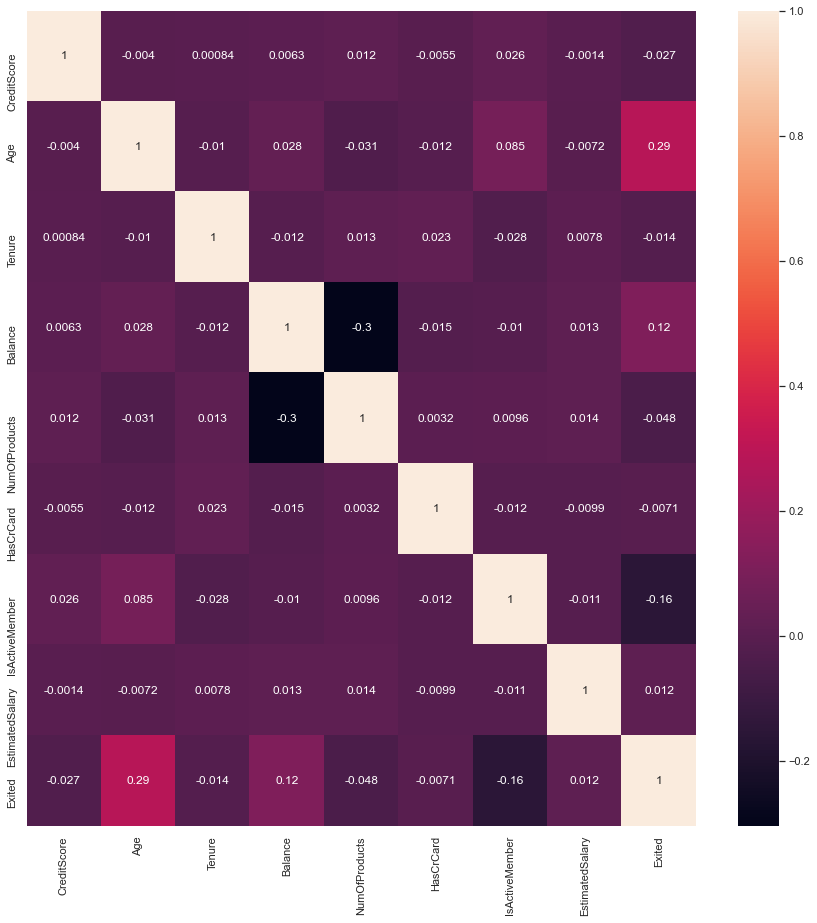

In [93]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

In [94]:
cat_feat = []

for column in df.columns.values:
    if (column != 'Exited') & (df[column].dtypes == 'O'):
        cat_feat.append(column)   
        
numd_feat = []

for column in df.columns.values:
    if (column != 'Exited') & (df[column].dtypes == 'int64'):
        numd_feat.append(column) 

numf_feat = []

for column in df.columns.values:
    if (column != 'Exited') & (df[column].dtypes == 'float64'):
        numf_feat.append(column)

In [95]:
def plot_bar(column):
    table = pd.DataFrame()
    table['Stay'] = df[df['Exited'] == 0][column].value_counts()
    table['Exited'] = df[df['Exited'] == 1][column].value_counts()
    table.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

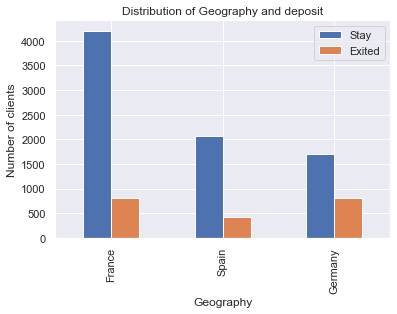

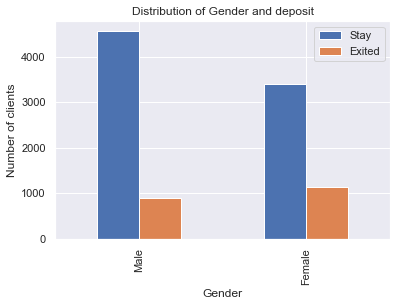

In [96]:
for column in cat_feat:
    plot_bar(column)

In [97]:
numd_feat

['CreditScore',
 'Age',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [98]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

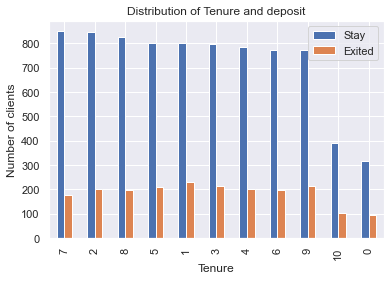

In [99]:
plot_bar('Tenure')

In [100]:
df['Tenure'] = std_scaler.fit_transform(df['Tenure'].values.reshape(-1,1))

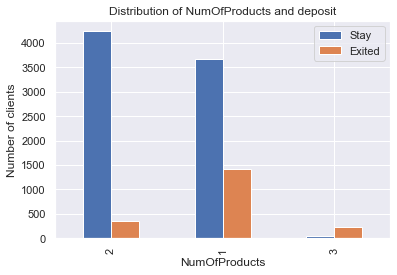

In [101]:
plot_bar('NumOfProducts')

In [117]:
df['NumOfProducts'] = rob_scaler.fit_transform(df['NumOfProducts'].values.reshape(-1,1))

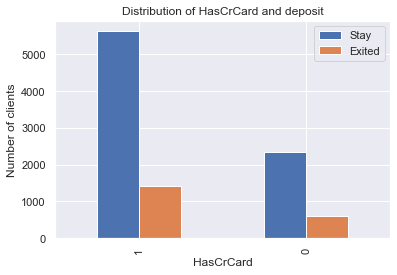

In [102]:
plot_bar('HasCrCard')

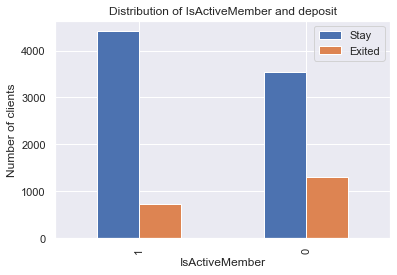

In [103]:
plot_bar('IsActiveMember')

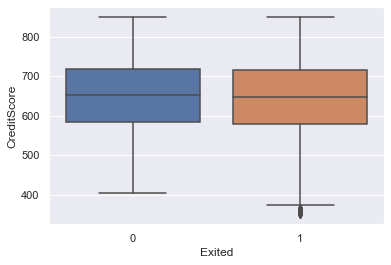

In [104]:
sns.boxplot(df['Exited'],df['CreditScore'])

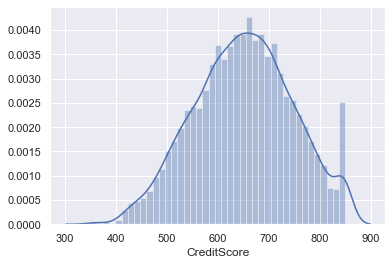

In [105]:
sns.distplot(df['CreditScore'])

In [106]:
df['CreditScore'] = std_scaler.fit_transform(df['CreditScore'].values.reshape(-1,1))

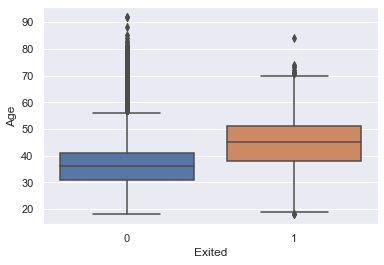

In [107]:
sns.boxplot(df['Exited'],df['Age'])

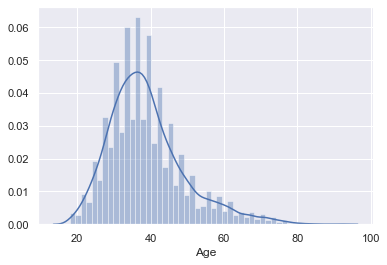

In [108]:
sns.distplot(df['Age'])

In [109]:
df['Age'] = std_scaler.fit_transform(df['Age'].values.reshape(-1,1))

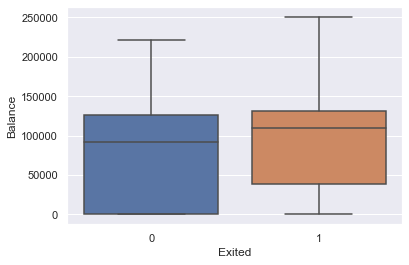

In [110]:
sns.boxplot(df['Exited'],df['Balance'])

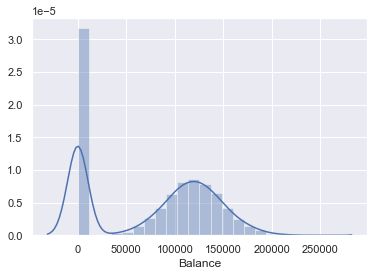

In [111]:
sns.distplot(df['Balance'])

In [112]:
df['Balance'] = std_scaler.fit_transform(df['Balance'].values.reshape(-1,1))

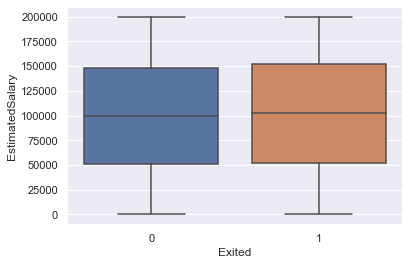

In [113]:
sns.boxplot(df['Exited'],df['EstimatedSalary'])

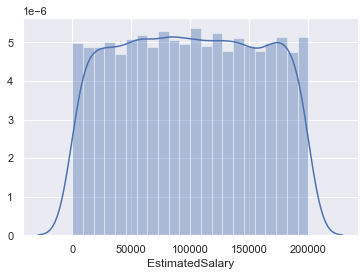

In [114]:
sns.distplot(df['EstimatedSalary'])

In [115]:
df['EstimatedSalary'] = std_scaler.fit_transform(df['EstimatedSalary'].values.reshape(-1,1))

In [118]:
df = pd.get_dummies(df, drop_first = True)

In [119]:
x = df.drop("Exited", axis=1)
y = df["Exited"]

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [121]:
def score(model):
    df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
    df1['Train Score'] = [accuracy_score(y_train, model.predict(x_train)), precision_score(y_train, model.predict(x_train)), roc_auc_score(y_train, model.predict_proba(x_train)[:,1])]
    df1['Test Score'] = [accuracy_score(y_test, model.predict(x_test)), precision_score(y_test, model.predict(x_test)), roc_auc_score(y_test, model.predict_proba(x_test)[:,1])]        
    return df1

In [122]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [123]:
score(lr)

,Train Score,Test Score
Accuracy,0.810625,0.808000
Precision,0.598628,0.589147
ROC AUC,0.765466,0.774830


In [124]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [125]:
score(dt)

,Train Score,Test Score
Accuracy,0.858750,0.856000
Precision,0.788684,0.787440
ROC AUC,0.847921,0.842254


In [128]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7)

In [129]:
score(rf)

,Train Score,Test Score
Accuracy,0.874125,0.865000
Precision,0.890841,0.862434
ROC AUC,0.891618,0.863293


In [138]:
mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 15)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=15, max_iter=100)

In [139]:
score(mlp)

,Train Score,Test Score
Accuracy,0.860500,0.863500
Precision,0.747115,0.761719
ROC AUC,0.868829,0.864108


In [140]:
cb = CatBoostClassifier(learning_rate = 0.005)
cb.fit(x_train, y_train)

0:	learn: 0.6889930	total: 21.5ms	remaining: 21.5s
1:	learn: 0.6847853	total: 30.7ms	remaining: 15.3s
2:	learn: 0.6807560	total: 40ms	remaining: 13.3s
3:	learn: 0.6769581	total: 50.1ms	remaining: 12.5s
4:	learn: 0.6732562	total: 59.3ms	remaining: 11.8s
5:	learn: 0.6693510	total: 68.4ms	remaining: 11.3s
6:	learn: 0.6658000	total: 75.7ms	remaining: 10.7s
7:	learn: 0.6618427	total: 85ms	remaining: 10.5s
8:	learn: 0.6581013	total: 94.3ms	remaining: 10.4s
9:	learn: 0.6541576	total: 103ms	remaining: 10.2s
10:	learn: 0.6503094	total: 113ms	remaining: 10.1s
11:	learn: 0.6467408	total: 122ms	remaining: 10s
12:	learn: 0.6431990	total: 131ms	remaining: 9.92s
13:	learn: 0.6398866	total: 140ms	remaining: 9.85s
14:	learn: 0.6360600	total: 149ms	remaining: 9.79s
15:	learn: 0.6325668	total: 158ms	remaining: 9.73s
16:	learn: 0.6292182	total: 167ms	remaining: 9.67s
17:	learn: 0.6261991	total: 176ms	remaining: 9.62s
18:	learn: 0.6228695	total: 186ms	remaining: 9.58s
19:	learn: 0.6196707	total: 195ms	rema

176:	learn: 0.3958802	total: 1.75s	remaining: 8.16s
177:	learn: 0.3954041	total: 1.77s	remaining: 8.16s
178:	learn: 0.3948236	total: 1.78s	remaining: 8.17s
179:	learn: 0.3941999	total: 1.79s	remaining: 8.16s
180:	learn: 0.3937443	total: 1.8s	remaining: 8.15s
181:	learn: 0.3933401	total: 1.81s	remaining: 8.14s
182:	learn: 0.3927394	total: 1.82s	remaining: 8.13s
183:	learn: 0.3922159	total: 1.83s	remaining: 8.12s
184:	learn: 0.3915982	total: 1.84s	remaining: 8.11s
185:	learn: 0.3911689	total: 1.85s	remaining: 8.09s
186:	learn: 0.3906659	total: 1.86s	remaining: 8.08s
187:	learn: 0.3902066	total: 1.87s	remaining: 8.07s
188:	learn: 0.3895784	total: 1.88s	remaining: 8.05s
189:	learn: 0.3891260	total: 1.89s	remaining: 8.04s
190:	learn: 0.3887634	total: 1.9s	remaining: 8.03s
191:	learn: 0.3881911	total: 1.91s	remaining: 8.02s
192:	learn: 0.3877954	total: 1.92s	remaining: 8.01s
193:	learn: 0.3873718	total: 1.92s	remaining: 7.99s
194:	learn: 0.3869046	total: 1.94s	remaining: 7.99s
195:	learn: 0.

335:	learn: 0.3497486	total: 3.48s	remaining: 6.88s
336:	learn: 0.3495597	total: 3.5s	remaining: 6.89s
337:	learn: 0.3493611	total: 3.52s	remaining: 6.9s
338:	learn: 0.3492330	total: 3.53s	remaining: 6.89s
339:	learn: 0.3490173	total: 3.56s	remaining: 6.9s
340:	learn: 0.3489116	total: 3.6s	remaining: 6.95s
341:	learn: 0.3487763	total: 3.63s	remaining: 6.99s
342:	learn: 0.3486038	total: 3.68s	remaining: 7.04s
343:	learn: 0.3484629	total: 3.69s	remaining: 7.04s
344:	learn: 0.3483194	total: 3.72s	remaining: 7.07s
345:	learn: 0.3481712	total: 3.76s	remaining: 7.12s
346:	learn: 0.3480346	total: 3.79s	remaining: 7.14s
347:	learn: 0.3479244	total: 3.81s	remaining: 7.13s
348:	learn: 0.3478281	total: 3.82s	remaining: 7.13s
349:	learn: 0.3476521	total: 3.85s	remaining: 7.14s
350:	learn: 0.3475463	total: 3.86s	remaining: 7.14s
351:	learn: 0.3473989	total: 3.9s	remaining: 7.18s
352:	learn: 0.3472424	total: 3.93s	remaining: 7.2s
353:	learn: 0.3471369	total: 3.96s	remaining: 7.24s
354:	learn: 0.3469

503:	learn: 0.3325163	total: 5.82s	remaining: 5.73s
504:	learn: 0.3324202	total: 5.83s	remaining: 5.72s
505:	learn: 0.3323566	total: 5.85s	remaining: 5.71s
506:	learn: 0.3323146	total: 5.86s	remaining: 5.7s
507:	learn: 0.3322619	total: 5.87s	remaining: 5.68s
508:	learn: 0.3322092	total: 5.88s	remaining: 5.67s
509:	learn: 0.3321550	total: 5.89s	remaining: 5.66s
510:	learn: 0.3320639	total: 5.91s	remaining: 5.66s
511:	learn: 0.3320197	total: 5.93s	remaining: 5.65s
512:	learn: 0.3319175	total: 5.94s	remaining: 5.64s
513:	learn: 0.3318732	total: 5.95s	remaining: 5.62s
514:	learn: 0.3317710	total: 5.96s	remaining: 5.61s
515:	learn: 0.3317279	total: 5.97s	remaining: 5.6s
516:	learn: 0.3316329	total: 5.98s	remaining: 5.59s
517:	learn: 0.3315623	total: 6s	remaining: 5.58s
518:	learn: 0.3314835	total: 6.01s	remaining: 5.57s
519:	learn: 0.3314061	total: 6.02s	remaining: 5.56s
520:	learn: 0.3313162	total: 6.04s	remaining: 5.55s
521:	learn: 0.3312278	total: 6.05s	remaining: 5.54s
522:	learn: 0.331

675:	learn: 0.3229730	total: 7.79s	remaining: 3.73s
676:	learn: 0.3229395	total: 7.8s	remaining: 3.72s
677:	learn: 0.3228947	total: 7.81s	remaining: 3.71s
678:	learn: 0.3228565	total: 7.82s	remaining: 3.7s
679:	learn: 0.3228072	total: 7.83s	remaining: 3.69s
680:	learn: 0.3227598	total: 7.84s	remaining: 3.67s
681:	learn: 0.3227314	total: 7.86s	remaining: 3.66s
682:	learn: 0.3227171	total: 7.86s	remaining: 3.65s
683:	learn: 0.3226768	total: 7.88s	remaining: 3.64s
684:	learn: 0.3226327	total: 7.89s	remaining: 3.63s
685:	learn: 0.3225955	total: 7.9s	remaining: 3.61s
686:	learn: 0.3225696	total: 7.91s	remaining: 3.6s
687:	learn: 0.3225213	total: 7.92s	remaining: 3.59s
688:	learn: 0.3225067	total: 7.92s	remaining: 3.58s
689:	learn: 0.3224621	total: 7.93s	remaining: 3.56s
690:	learn: 0.3224095	total: 7.95s	remaining: 3.55s
691:	learn: 0.3223604	total: 7.96s	remaining: 3.54s
692:	learn: 0.3223308	total: 7.97s	remaining: 3.53s
693:	learn: 0.3222940	total: 7.98s	remaining: 3.52s
694:	learn: 0.32

844:	learn: 0.3165479	total: 10.3s	remaining: 1.89s
845:	learn: 0.3165247	total: 10.3s	remaining: 1.88s
846:	learn: 0.3165002	total: 10.4s	remaining: 1.87s
847:	learn: 0.3164519	total: 10.4s	remaining: 1.86s
848:	learn: 0.3164309	total: 10.4s	remaining: 1.84s
849:	learn: 0.3163785	total: 10.4s	remaining: 1.83s
850:	learn: 0.3163585	total: 10.4s	remaining: 1.82s
851:	learn: 0.3163149	total: 10.4s	remaining: 1.81s
852:	learn: 0.3162690	total: 10.4s	remaining: 1.8s
853:	learn: 0.3162213	total: 10.4s	remaining: 1.79s
854:	learn: 0.3161946	total: 10.5s	remaining: 1.77s
855:	learn: 0.3161515	total: 10.5s	remaining: 1.76s
856:	learn: 0.3161226	total: 10.5s	remaining: 1.75s
857:	learn: 0.3160888	total: 10.5s	remaining: 1.74s
858:	learn: 0.3160431	total: 10.5s	remaining: 1.73s
859:	learn: 0.3160214	total: 10.5s	remaining: 1.71s
860:	learn: 0.3159926	total: 10.5s	remaining: 1.7s
861:	learn: 0.3159717	total: 10.6s	remaining: 1.69s
862:	learn: 0.3159278	total: 10.6s	remaining: 1.68s
863:	learn: 0.

In [141]:
score(cb)

,Train Score,Test Score
Accuracy,0.871375,0.872500
Precision,0.815983,0.827586
ROC AUC,0.889323,0.875675


In [142]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
score(xgb)

,Train Score,Test Score
Accuracy,0.905125,0.867500
Precision,0.894118,0.762963
ROC AUC,0.946293,0.858839


In [144]:
def build_feature_importance(model, x_train, y_train):
    
    data = pd.DataFrame(model.feature_importances_, x.columns.values, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[12,8])
    sns.barplot(x ='index', y='feature', data=data[:10], palette="Blues_d")
    plt.title('Feature inportance of {}'.format(model))
    plt.xticks(rotation=45)
    plt.show();

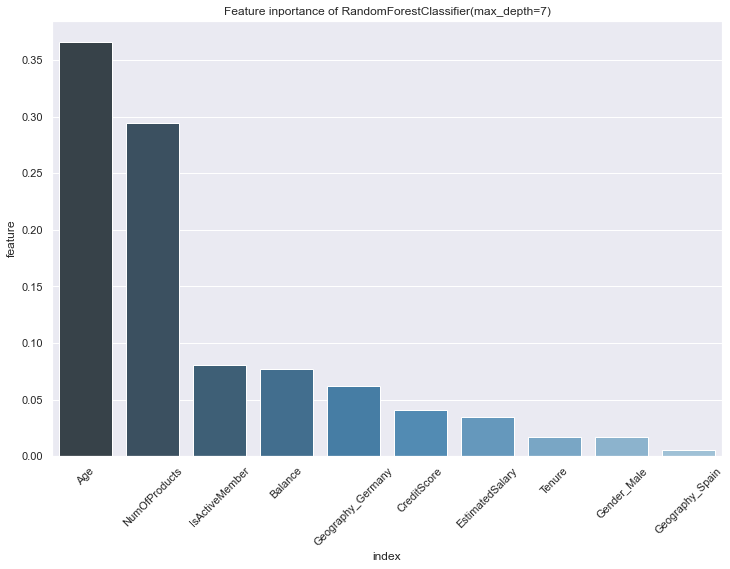

In [145]:
build_feature_importance(rf, x_train, y_train)

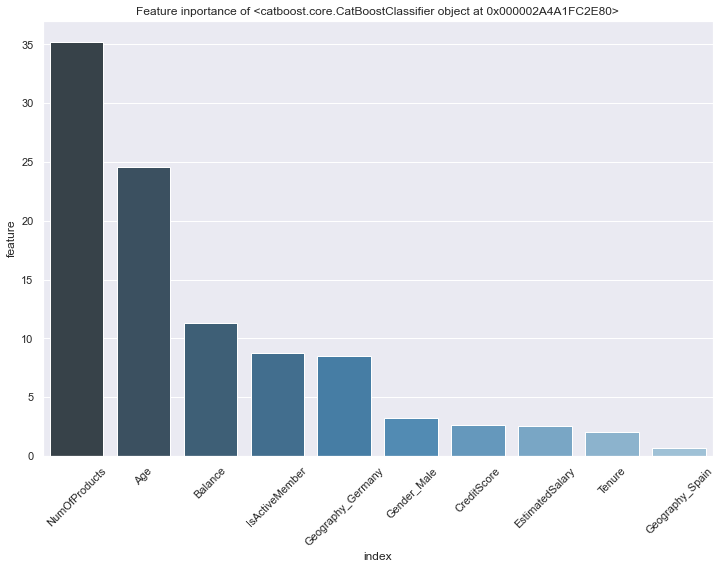

In [148]:
build_feature_importance(cb, x_train, y_train)

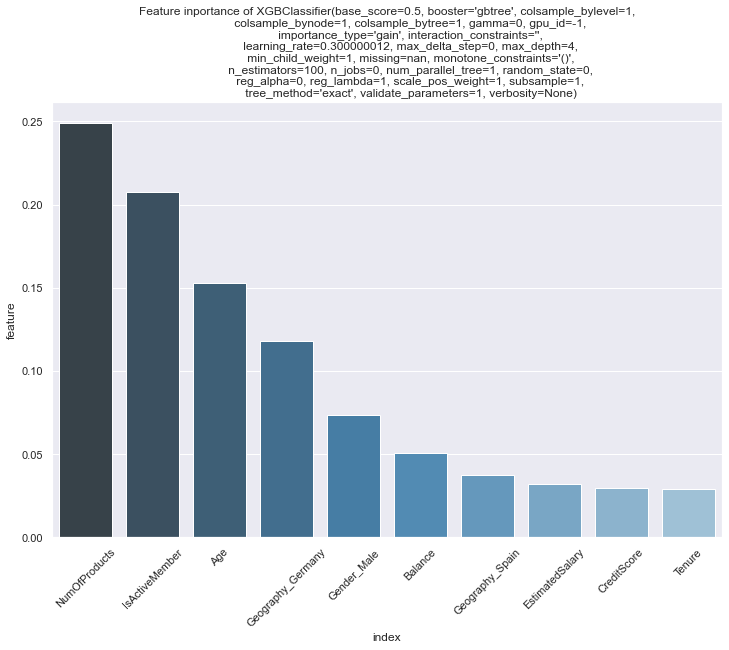

In [149]:
build_feature_importance(xgb, x_train, y_train)